In [1]:
import numpy as np
import pandas as pd

In [40]:
#读取鸢尾花数据集，header参数指定标题行，如果没有标题，则直接指定none就OK了
data = pd.read_csv(r"Iris.csv")
data.head(10)#可以通过填入数字来确定显示头几行数据
data.tail()#显示末尾的数据，同样可以指定多少行
data.sample(10)#随机抽选一条值，可通过设置来抽取数据
data["class"] = data["class"].map({"Iris-virginica":0,"Iris-setosa":1,"Iris-versicolor":2})#选择class列,通过map字典将其映射为不同的值
data.sample(10)
#不需要id这一列，可以进行删除
data = data.drop("id",axis=1)#通过drop方法删除指定列名的数据，但是axis需要设置为1，竖向删除，默认为0表示横向
#或者是：data.drop("id",axis=1,inplace=True)表示本地修改就不用赋值了，可以直接进行修改
data
#去除重复的值
data.drop_duplicates(inplace=True)#在原有数据集上进行操作
data
#查看各个类别的鸢尾花有多少条记录
data["class"].value_counts()

2    50
0    49
1    48
Name: class, dtype: int64

In [41]:
class KNN:
    '''使用python语言进实现k近邻算法，(实现分类)'''
    def __init__(self,k):
        '''始化方法
        Paraneters
        ---
        k：int
            邻居的个数
        '''
        self.k = k#初始化k值
        
    def fit(self,X,y):#训练方法
        '''
        对于矩阵使用大写，向量使用小写
        Paraneters
        ---
        X：类数组类型,List,NP.array,dataframe,形状为[样本数量，特征数量]
            待训练的样本特征(属性)
        y:类数组类型，形状为[样本数量]
            每个样本的目标值，也就是标签。
        '''
        self.X = np.asarray(X)#将X转换为np.array数组类型
        self.y = np.asarray(y)
        
    def predict(self,X):#预测方法
        '''
        根据参数传递的样本，对样本数据进行预测
        Paraneters
        ---
        X：类数组类型,List,NP.array,dataframe,形状为[样本数量，特征数量]
            待训练的样本特征(属性)
        
        Returns
        ----
        result:数组类型
            预测结果。
        '''
        X = np.asarray(X)#这个是测试集
        result = []
        #每次会取出X中的一行数据，就是一个样本
        for x in X:
            #可以直接对数组内的内容进行运算，与每个x进行减法运算
            #公式距离计算距离：平方求和，再开根号,axis=1只对每一行进行操作
            #对于测试集中的每一个样本，依次与训练集中所有样本求距离
            dis = np.sqrt(np.sum((x-self.X)**2,axis=1))#这里面的self.X是训练集中的数据
            index = dis.argsort()#返回排序中每个元素在之前的数组中的位置,可以找到，在训练集中的位置
            
            #进行截取，只取前k个元素[取距离最近的k个元素的索引]
            index = index[:self.k]
            #可以直接放进去,找到对应的类别
            #返回数组中每个元素出现的次数，元素必须是非负的整数,分别对应输出从0，到n出现的次数
            count = np.bincount(self.y[index])
            #找到值最大的索引，最大的索引就是对应的类别,加入结果
            result.append(count.argmax())
            
        return np.asarray(result)
            
        
        
        

In [42]:
x = np.array([1,2,3])
y = np.array([[4,5,6],
              [1,2,3]])
((x-y)**2)#当行数不同时，进行广播操作，将行数扩展，可以直接平方操作
x = np.array([-19,40,34,0])
x.argsort()
x[[0,2]]
a = np.array([0,1,2,9,9])
np.bincount(a)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 2], dtype=int64)

In [45]:
#测试与训练：
#1提取每个类别的鸢尾花数据
t0 = data[data["class"]==0]
t1 = data[data["class"]==1]
t2 = data[data["class"]==2]
#使用sample可以随机打乱,只要random_state的值一样，就可以按照相同顺序进行打乱
t0 = t0.sample(len(t0),random_state=0)
t1 = t1.sample(len(t1),random_state=0)
t2 = t2.sample(len(t2),random_state=0)
#将不同的矩阵并到一起,axis=0表示纵向方式拼接到一起
train_X = pd.concat([t0.iloc[:40,:-1],t1.iloc[:40,:-1],t2.iloc[:40,:-1]],axis=0)
train_y = pd.concat([t0.iloc[:40,-1],t1.iloc[:40,-1],t2.iloc[:40,-1]],axis=0)
test_X = pd.concat([t0.iloc[40:,:-1],t1.iloc[40:,:-1],t2.iloc[40:,:-1]],axis=0)
test_y = pd.concat([t0.iloc[40:,-1],t1.iloc[40:,-1],t2.iloc[40:,-1]],axis=0)



#类的使用
knn = KNN(k=3)
#进行训练
knn.fit(train_X,train_y)
#进行测试，获得结果
result = knn.predict(test_X)
display(result)

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2], dtype=int64)

In [61]:
from matplotlib import pyplot as plt
import matplotlib as mpl
#默认情况下不支持中文显示，需要进行设置
#设置黑体，支持中文显示
mpl.rcParams["font.family"] = "SimHei"
#在设置中文字体时，能够正常的显示符号
mpl.rcParams["axes.unicode_minus"] = False

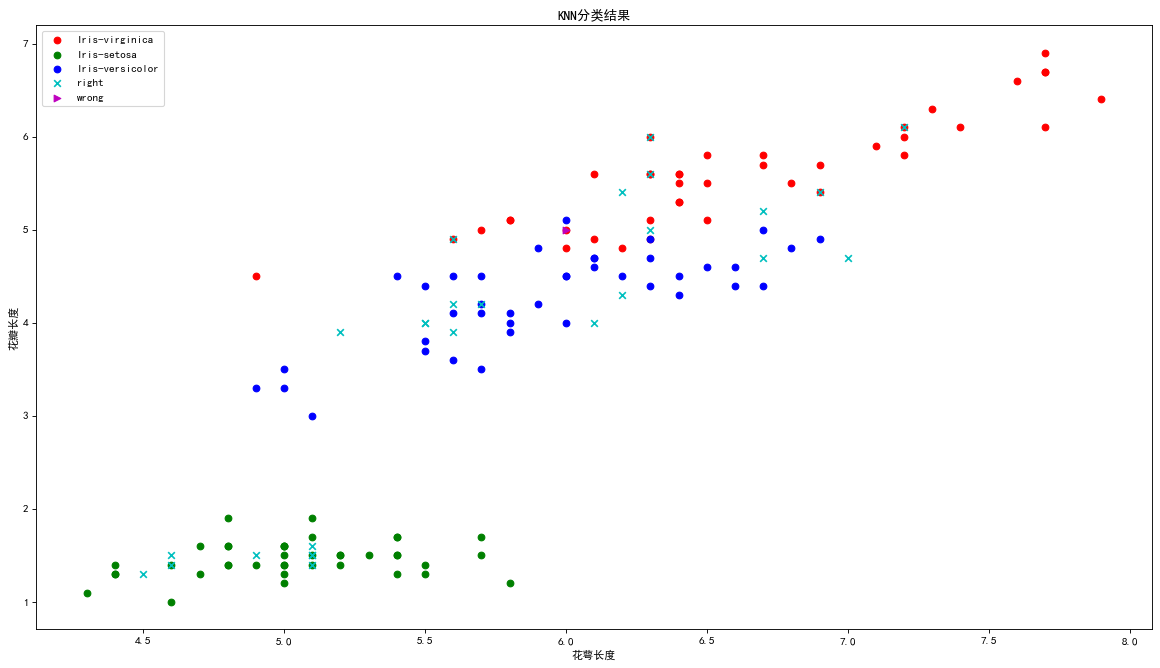

In [63]:
#可视化：
#{"Iris-virginica":0,"Iris-setosa":1,"Iris-versicolor":2}
plt.figure(figsize=(18,10),dpi=80)
plt.scatter(x=t0["sepallength"][:40],y=t0["petallength"][:40],color="r",label="Iris-virginica")
plt.scatter(x=t1["sepallength"][:40],y=t1["petallength"][:40],color="g",label="Iris-setosa")
plt.scatter(x=t2["sepallength"][:40],y=t2["petallength"][:40],color="b",label="Iris-versicolor")
#绘制测试集数据
right = test_X[result==test_y]#筛选出正确的结果
wrong = test_X[result!=test_y]#筛选出错误的结果
plt.scatter(x=right["sepallength"],y=right["petallength"],color="c",marker="x",label="right")
plt.scatter(x=wrong["sepallength"],y=wrong["petallength"],color="m",marker=">",label="wrong")
plt.xlabel("花萼长度")
plt.ylabel("花瓣长度")
plt.title("KNN分类结果")
plt.legend(loc="best")
plt.show()

In [48]:
t0 = data[data["class"]==0]
t0.iloc[:40,:4]#取出1-40行，不包括40行

,sepallength,sepalwidth,petallength,petalwidth
100,6.3,3.3,6.0,2.5
101,5.8,2.7,5.1,1.9
102,7.1,3.0,5.9,2.1
103,6.3,2.9,5.6,1.8
104,6.5,3.0,5.8,2.2
105,7.6,3.0,6.6,2.1
106,4.9,2.5,4.5,1.7
107,7.3,2.9,6.3,1.8
108,6.7,2.5,5.8,1.8
109,7.2,3.6,6.1,2.5
